<a href="https://colab.research.google.com/github/lucusp/data_analysis/blob/main/Medical_Data_Visualizer_FCC_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv(f'drive/MyDrive/medical_examination.csv')

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


# Add **'overweight'** column

In [ ]:
df['overweight'] = (df['weight'] / ((df['height']/100) ** 2) > 25).astype(int)

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

In [ ]:
df['cholesterol'] = [0 if value == 1 else 1 for value in df['cholesterol']]

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,1,0,0,0,0,0


In [ ]:
df['gluc'] = [0 if value == 1 else 1 for value in df['gluc']]

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


# Draw Categorical Plot

## Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'

In [ ]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

df_cat.head()

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0


## Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.

In [ ]:
df_cat = pd.DataFrame(df_cat.groupby(['variable','value','cardio'])['value'].count()).rename(columns={'value':'total'}).reset_index()

df_cat

,variable,value,cardio,total
0,active,0,0,6378
1,active,0,1,7361
2,active,1,0,28643
3,active,1,1,27618
4,alco,0,0,33080
5,alco,0,1,33156
6,alco,1,0,1941
7,alco,1,1,1823
8,cholesterol,0,0,29330
9,cholesterol,0,1,23055


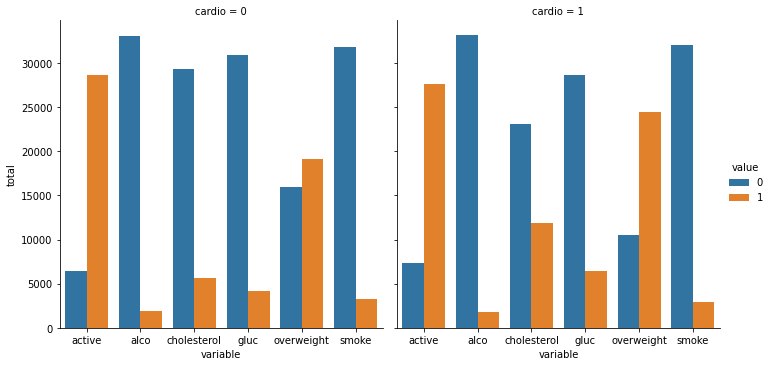

In [ ]:
sns.catplot(data=df_cat, kind='bar', x='variable', y='total', hue='value', col='cardio')

## Clean the data. Filter out the following patient segments that represent incorrect data:
- diastolic pressure is higher than systolic (Keep the correct data with ```df['ap_lo'] <= df['ap_hi'])```)
- height is less than the 2.5th percentile (Keep the correct data with (```df['height'] >= df['height'].quantile(0.025))```)
- height is more than the 97.5th percentile
- weight is less than the 2.5th percentile
- weight is more than the 97.5th percentile

In [ ]:
df[df['ap_lo'] > df['ap_hi']]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
228,314,17489,2,183,98.0,160,1100,0,1,1,0,1,1,1
241,334,21932,2,157,60.0,160,1000,1,0,0,0,0,1,0
260,357,18217,1,150,83.0,140,800,0,0,0,0,1,1,1
329,458,23407,1,176,63.0,160,1000,1,1,0,0,0,1,0
345,482,18704,1,154,81.0,140,1000,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69771,99659,23330,1,167,81.0,160,1000,0,0,0,0,1,1,1
69872,99798,21808,1,152,56.0,160,1000,0,0,0,0,1,1,0
69878,99807,21239,2,168,95.0,160,1000,0,0,0,0,1,1,1
69885,99816,22417,2,166,78.0,170,1000,0,0,0,0,0,0,1


In [ ]:
df = df[df['ap_lo'] <= df['ap_hi']]

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68766 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68766 non-null  int64  
 1   age          68766 non-null  int64  
 2   gender       68766 non-null  int64  
 3   height       68766 non-null  int64  
 4   weight       68766 non-null  float64
 5   ap_hi        68766 non-null  int64  
 6   ap_lo        68766 non-null  int64  
 7   cholesterol  68766 non-null  int64  
 8   gluc         68766 non-null  int64  
 9   smoke        68766 non-null  int64  
 10  alco         68766 non-null  int64  
 11  active       68766 non-null  int64  
 12  cardio       68766 non-null  int64  
 13  overweight   68766 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.9 MB


In [ ]:
df = df[df['height'] >= df['height'].quantile(0.025)]

In [ ]:
df = df[df['height'] <= df['height'].quantile(0.975)]

In [ ]:
df = df[(df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]

## Calculate the correlation Matrix

In [ ]:
correlations = df.corr()

In [ ]:
t

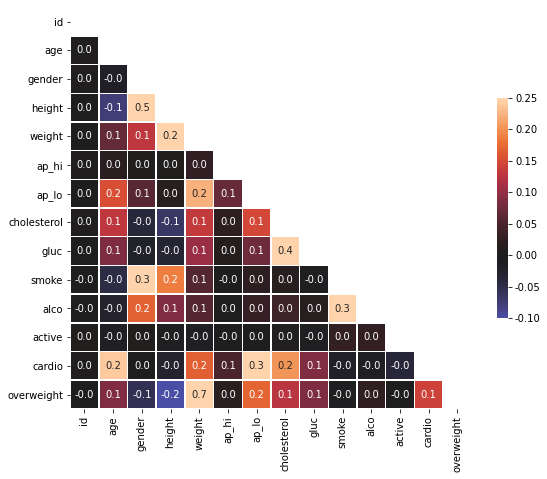

In [ ]:
mask = np.triu(correlations)
f, ax = plt.subplots(figsize=(9, 9))
ax = sns.heatmap(
  correlations,
  linewidths=.5,
  annot=True,
  fmt='.1f',
  mask=mask,
  square=True,
  center=0,
  vmin=-0.1,
  vmax=0.25,
  cbar_kws={'shrink':.45, 'format':'%.2f'}
  )